In [1]:
from math import ceil, log
from time import time
from typing import Callable
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

# Método de la secante

In [2]:
def secante(fn: Callable, p1, p2, error: float = 0.000001, max_iter: int = 20, iter: int = 1):
    x = p2 - fn(p2)*(p2 - p1)/(fn(p2) - fn(p1))

    if abs(fn(x)) <= error or max_iter == 1:
        return x

    return secante(fn, p1, x, error, max_iter, iter + 1)

def secante2(fn: Callable, p1, p2, error: float = 0.000001, iter: int = 1):
    x = p2 - fn(p2)*(p2 - p1)/(fn(p2) - fn(p1))

    if abs(fn(x)) <= error:
        return x, iter

    return secante2(fn, p1, x, error, iter + 1)

In [3]:
def plot_method(fn: Callable, x0: float, x1: float, error: float = 0.000001, max_iters = 20):
    start = time()
    r = secante(fn, x0, x1, error, max_iters)
    end = time()

    elapsed = (end - start) * 1000

    x = np.linspace(x0, x1, 100)
    y = fn(x)
    yr = fn(r)
    plt.plot(x, y)
    plt.scatter(r, yr, color = "black")
    plt.text(r, yr + 1, f'Found f({r:.2f}) = 0 in {elapsed:.2f}ms')
    plt.show()


def plot_method2(fn: Callable, x0: float, x1: float, error: float = 0.000001, max_iters = 20):
    start = time()
    r, iter = secante2(fn, x0, x1, error)
    end = time()

    elapsed = (end - start) * 1000

    x = np.linspace(x0, x1, 100)
    y = fn(x)
    yr = fn(r)
    plt.plot(x, y)
    plt.scatter(r, yr, color = "black")
    plt.text(r, yr + 1, f'Found f({r:.2f}) = 0 in {elapsed:.2f}ms with iter = {iter}')
    plt.show()

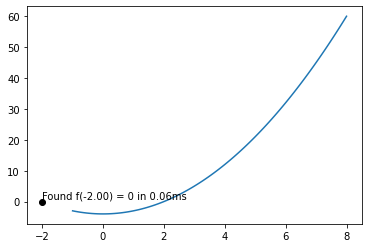

In [4]:
plot_method(lambda x: x ** 2 - 4, -1, 8)

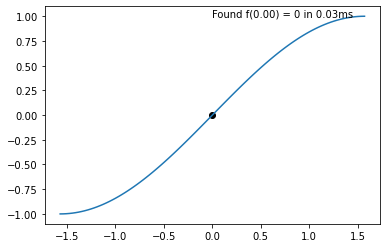

In [5]:
plot_method(lambda x: np.sin(x), -np.pi / 2, np.pi / 2)

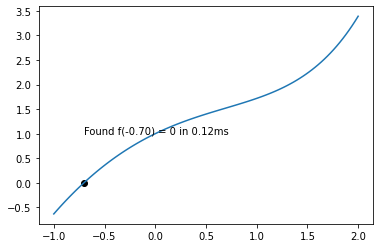

In [6]:
plot_method(lambda x: np.exp(x) - x**2, -1, 2)

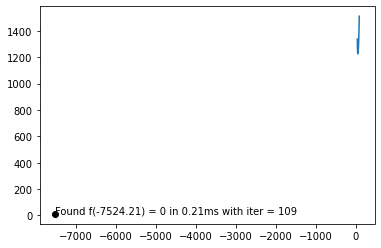

In [7]:
plot_method(lambda x: 204165.5 / (330 - 2 * x) + 10400/ (x - 20), 40, 90, error = 12)